In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from glob import glob as g
import cv2
from tqdm.notebook import tqdm
from shutil import copy, move

### Data Prepration

#### Validation set

In [2]:
# path to the downloaded WIDER Face validation set
val_gt = 'wider_face_split/wider_face_split/wider_face_val_bbx_gt.txt'
val_imgs = 'WIDER_val/WIDER_val/images'

# path to save the data after preprocessing
new_imgs_dir = 'processed/images/val'
new_gt_dir = 'processed/labels/val'

# create new directories
os.makedirs(new_imgs_dir, exist_ok = True)
os.makedirs(new_gt_dir, exist_ok = True)

In [3]:
# read the validation ground truth text file 
annots = open(val_gt) 
lines = annots.readlines()
img_names =   [x for x in lines if 'jpg' in x]
indices = [lines.index(x) for x in img_names]

In [4]:
for n in tqdm(range(len(img_names))):
    i = indices[n]
    name = lines[i].rstrip()
    old_img_path = os.path.join(val_imgs , name)
    name = name.split('/')[-1]
    label_path = os.path.join(new_gt_dir , name.split('.')[0] + '.txt')
    img_path = os.path.join(new_imgs_dir , name)
    
    num_objs = int(lines[i+1].rstrip())
    bboxs = lines[i+2 : i+2+num_objs]
    bboxs = list(map(lambda x:x.rstrip() , bboxs))
    bboxs = list(map(lambda x:x.split()[:4], bboxs))
    # if len(bboxs) > 5:
    # continue
    img = cv2.imread(old_img_path)
    img_h,img_w,_ = img.shape
    f = open(label_path, 'w')
    count = 0 
    # Num of bounding box
    for bbx in bboxs:
        x1 = int(bbx[0])
        y1 = int(bbx[1])
        w = int(bbx[2])
        h = int(bbx[3])
    #yolo format:
        x = (x1 + w//2) / img_w
        y = (y1 + h//2) / img_h
        w = w / img_w
        h = h / img_h
        if w * h * 100 > 0.5:
            yolo_line = f'{0} {x} {y} {w} {h}\n'
            f.write(yolo_line)
            count += 1
    f.close()
    if count > 0:   
        copy(old_img_path , img_path)
    else:
        os.remove(label_path)

  0%|          | 0/3226 [00:00<?, ?it/s]

In [5]:
# path to the downloaded WIDER Face validation set
train_gt = 'wider_face_split/wider_face_split/wider_face_train_bbx_gt.txt'
train_imgs = 'WIDER_train/WIDER_train/images'

# path to save the data after preprocessing
new_train_imgs_dir = 'processed/images/train'
new_train_gt_dir = 'processed/labels/train'

# create new directories
os.makedirs(new_train_imgs_dir, exist_ok = True)
os.makedirs(new_train_gt_dir, exist_ok = True)

In [6]:
annots_train = open(train_gt) 
lines_train = annots_train.readlines()
train_img_names =   [x for x in lines_train if 'jpg' in x]
indices_train = [lines_train.index(x) for x in train_img_names]

In [7]:
for n in tqdm(range(len(train_img_names))):
    i = indices_train[n]
    name = lines_train[i].rstrip()
    old_img_path = os.path.join(train_imgs , name)
    name = name.split('/')[-1]
    label_path = os.path.join(new_train_gt_dir, name.split('.')[0] + '.txt')
    img_path = os.path.join(new_train_imgs_dir, name)
    num_objs = int(lines_train[i+1].rstrip())
    bboxs = lines_train[i+2 : i+2+num_objs]
    bboxs = list(map(lambda x:x.rstrip(), bboxs))
    bboxs = list(map(lambda x:x.split()[:4], bboxs))
    # if len(bboxs) > 5:
    #     continue
    img = cv2.imread(old_img_path)
    img_h, img_w, _ = img.shape
    f = open(label_path, 'w')
    count = 0 # Num of bounding box
    for bbx in bboxs:
        x1 = int(bbx[0])
        y1 = int(bbx[1])
        w = int(bbx[2])
        h = int(bbx[3])
    #     #yolo:
        x = (x1 + w//2) / img_w
        y = (y1 + h//2) / img_h
        w = w / img_w
        h = h / img_h
        if w * h * 100 > 0.5:
            yolo_line = f'{0} {x} {y} {w} {h}\n'
            f.write(yolo_line)
            count += 1
    f.close()
    if count > 0:   
        copy(old_img_path , img_path)
    else:
        os.remove(label_path)

  0%|          | 0/12880 [00:00<?, ?it/s]

In [8]:
def resize_img(input_name , output_name, target_width = 640):
    im = cv2.imread(input_name)
    h,w,_  = im.shape
    target_height = int(h / w * target_width)
    im = cv2.resize(im , (target_width , target_height), interpolation = cv2.INTER_AREA)
    cv2.imwrite(output_name , im)

def resize_all_imgs(imgs_dir):
    names = g(os.path.join(imgs_dir , '*'))
    for img in tqdm(names):
        resize_img(img, img)

In [9]:
gt = g('processed/labels/*/*')
print(f'Threre are {len(gt)}  images')

Threre are 10738  images


In [10]:
resize_all_imgs('processed/images/*')

  0%|          | 0/10738 [00:00<?, ?it/s]

In [11]:
n = np.random.randint(0, len(gt))
f = open(gt[n])

lines_gt = f.readlines()

In [12]:
lines_gt

['0 0.123046875 0.6857142857142857 0.08203125 0.16\n',
 '0 0.4482421875 0.43857142857142856 0.103515625 0.19142857142857142\n',
 '0 0.5703125 0.34714285714285714 0.0859375 0.1457142857142857\n',
 '0 0.775390625 0.38857142857142857 0.09375 0.15428571428571428\n',
 '0 0.802734375 0.66 0.078125 0.14285714285714285\n',
 '0 0.8505859375 0.15428571428571428 0.068359375 0.15428571428571428\n',
 '0 0.7001953125 0.20142857142857143 0.068359375 0.13428571428571429\n',
 '0 0.5205078125 0.10571428571428572 0.068359375 0.12571428571428572\n',
 '0 0.40625 0.19142857142857142 0.07421875 0.14857142857142858\n',
 '0 0.2880859375 0.21285714285714286 0.064453125 0.13428571428571429\n',
 '0 0.2236328125 0.4 0.068359375 0.13714285714285715\n']

number of bounding boxes : 7
Shape on the image : (591, 640, 3)


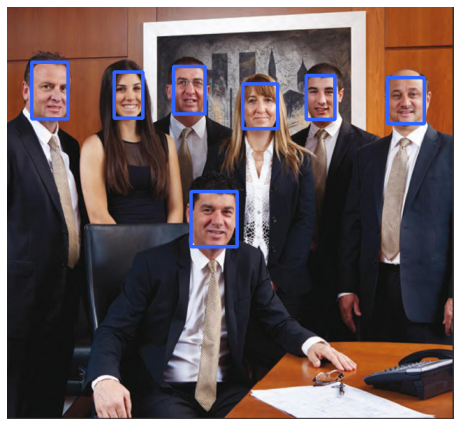

In [13]:
n = np.random.randint(0, len(gt))
f = open(gt[n])

lines = f.readlines()
classes = list(map(lambda x: int(x[0]), lines))
lines = list(map(lambda x:x.rstrip()[2:], lines))
objects = list(map(lambda x:(x.split()), lines))

img = cv2.imread(gt[n].replace('txt','jpg').replace('labels', 'images'))
for c, bbox in zip(classes, objects):
    bbox = list(map(lambda x:float(x), bbox))
    x,y,w,h = bbox
    img_h = img.shape[0]
    img_w = img.shape[1]
    x = int(x * img_w)
    w = int(w * img_w)
    y = int(y * img_h)
    h = int(h * img_h)
    color = (255,100,50)
    cv2.rectangle(img , (int(x-w/2), int(y-h/2)), (int(x+w/2), int(y+h/2)), color , 4)
plt.figure(figsize = (8,8))
plt.imshow(img[:,:,::-1]); plt.axis('off')
print(f'number of bounding boxes : {len(classes)}')
print(f'Shape on the image : {img.shape}')

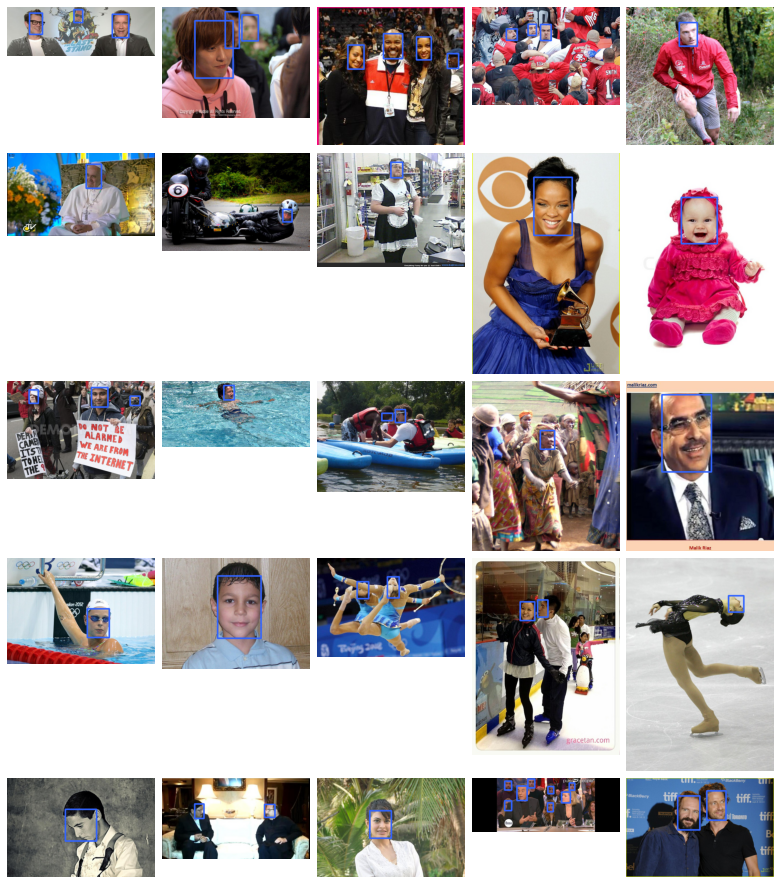

In [14]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import numpy as np

images = []
for _ in range(25):
    n = np.random.randint(0, len(gt))
    f = open(gt[n])

    lines = f.readlines()
    classes = list(map(lambda x: int(x[0]), lines))
    lines = list(map(lambda x:x.rstrip()[2:], lines))
    objects = list(map(lambda x:(x.split()), lines))

    img = cv2.imread(gt[n].replace('txt','jpg').replace('labels', 'images'))
    for c, bbox in zip(classes, objects):
        bbox = list(map(lambda x:float(x), bbox))
        x,y,w,h = bbox
        img_h = img.shape[0]
        img_w = img.shape[1]
        x = int(x * img_w)
        w = int(w * img_w)
        y = int(y * img_h)
        h = int(h * img_h)
        color = (255,100,50)
        cv2.rectangle(img , (int(x-w/2), int(y-h/2)), (int(x+w/2), int(y+h/2)), color , 6)
    # plt.figure(figsize = (8,8))
    # plt.imshow(img[:,:,::-1]); plt.axis('off')
    # print(f'number of bounding boxes : {len(classes)}')
    images.append(img[:,:,::-1])
fig = plt.figure(figsize=(16., 16.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(5 ,5),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )
for ax, im in zip(grid, images):
    # Iterating over the grid returns the Axes.
    ax.imshow(im)
    ax.axis('off')
fig.savefig('grid_output.png')
plt.show()
